# DAT210x - Programming with Python for DS

## Module5- Lab8

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [9]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

### The Assignment

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [10]:
import pandas as pd
x = pd.read_csv('DatasetS/life_expectancy.csv',delimiter='\t')

In [6]:
x.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [7]:
x.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


In [13]:
X_train = x.Year[x['Year'] < 1986]


In [14]:
Y_train = x.WhiteMale[x['Year'] < 1986]

In [15]:
X_train = X_train.to_frame()

Train your model then pass it into `drawLine` with your training set and labels. You can title it 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

In [16]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


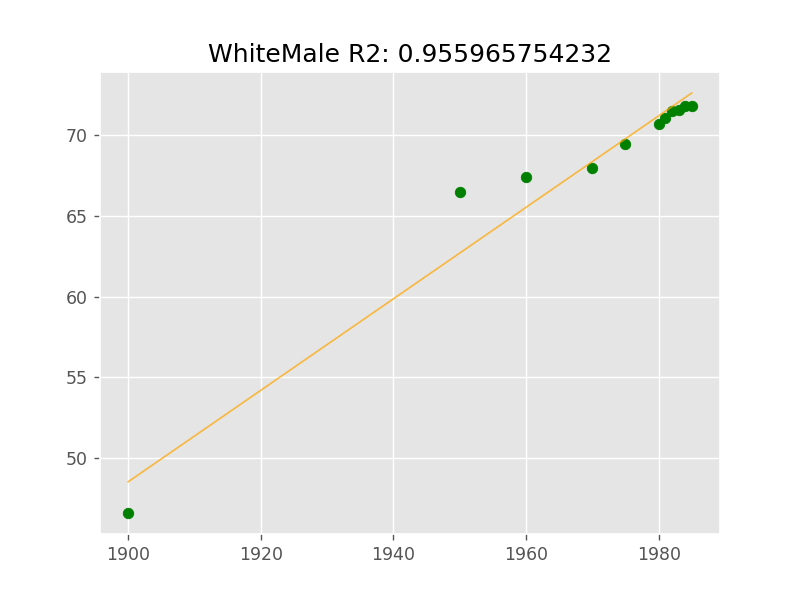

('Est 2014 WhiteMale Life Expectancy: ', 80.856354256233772)
('Est 2030 WhiteMale Life Expectancy: ', 85.39349383777585)
('Est 2045 WhiteMale Life Expectancy: ', 89.647062195471449)


In [17]:
%matplotlib notebook
drawLine(model, X_train, Y_train, 'WhiteMale')

Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [18]:
x.WhiteMale[x.Year == 2014]

39    76.7
Name: WhiteMale, dtype: float64

Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

In [19]:
X_train = x.Year[x['Year'] < 1986]
Y_train = x.BlackFemale[x['Year'] < 1986]
X_train = X_train.to_frame()

In [20]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


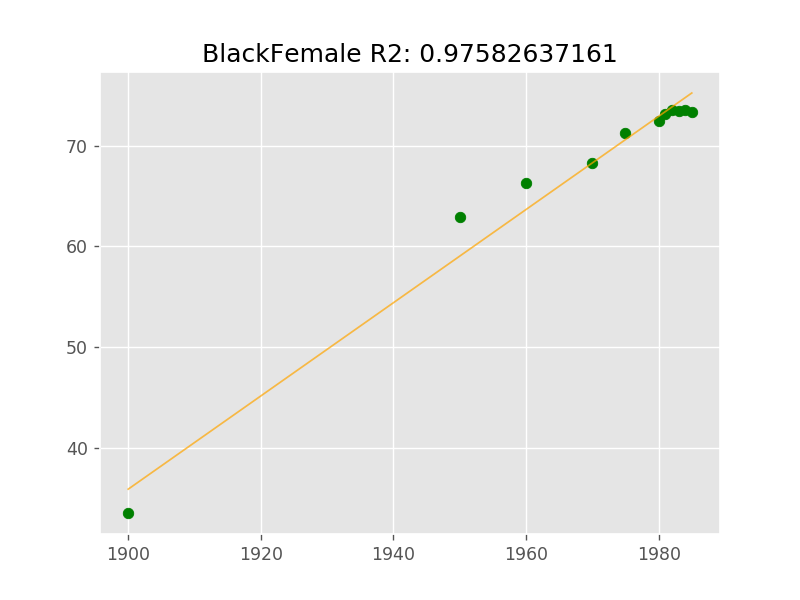

('Est 2014 BlackFemale Life Expectancy: ', 88.698899398108324)
('Est 2030 BlackFemale Life Expectancy: ', 96.114388076812816)
('Est 2045 BlackFemale Life Expectancy: ', 103.06640871309833)


In [21]:
%matplotlib notebook
drawLine(model, X_train, Y_train, 'BlackFemale')

Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

In [22]:
x.BlackFemale[x.Year == 2014]

39    78.4
Name: BlackFemale, dtype: float64

In [23]:
x.corr()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
Year,1.000000,0.974154,0.913907,0.960635,0.940429
WhiteMale,0.974154,1.000000,0.975164,0.987974,0.985009
WhiteFemale,0.913907,0.975164,1.000000,0.956689,0.994656
BlackMale,0.960635,0.987974,0.956689,1.000000,0.975922
BlackFemale,0.940429,0.985009,0.994656,0.975922,1.000000


In [ ]:
plt.show()

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.